## 📋 Table of Contents

This notebook covers the following sections:

1. **Document Layout Extraction (OCR)**: Using Azure AI Document Intelligence to extract document layouts in Markdown format.
2. **Classification text with LLM (Text + prompt)**: Leveraging GPT-4 Onmi for classification tasks through prompt engineering.
3. **Classification text with MaaS (SLM) (Text + prompt)**: Utilizing the Phi-3 Medium version of MaaS for classification.

In [1]:
import os

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbb-ai-smart-document-processing"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

from utils.ml_logging import get_logger

logger = get_logger()

Directory changed to C:\Users\pablosal\Desktop\gbb-ai-smart-document-processing


In [2]:
from src.aoai.azure_openai import AzureOpenAIManager

az_manager = AzureOpenAIManager(
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    chat_model_name=os.getenv("DEPLOYMENT_ID"),
    api_key=os.getenv("OPENAI_API_KEY"),
    api_version=os.getenv("DEPLOYMENT_VERSION"),
)

## Document Layout Extraction (OCR) with Azure AI Document Intelligence

Azure's Document Analysis Client provides a variety of pre-trained models that can be used to analyze documents. The `analyze_document` function takes in a document (either a URL or a file path) and the type of pre-trained model to use for analysis.

Here's a brief overview of the available pre-trained models:

- `'prebuilt-layout'`: This is the default model. It extracts text, tables, selection marks, and structure elements from the document.

- `'prebuilt-read'`: This model extracts both print and handwritten text.

- `'prebuilt-tax'`: This model is designed to process US tax documents.

- `'prebuilt-invoice'`: This model automates the processing of invoices.

- `'prebuilt-receipt'`: This model scans sales receipts for key data.

- `'prebuilt-id'`: This model processes identity documents.

- `'prebuilt-businesscard'`: This model extracts information from business cards.

- `'prebuilt-contract'`: This model analyzes contractual agreements.

- `'prebuilt-healthinsurancecard'`: This model processes health insurance cards.

In addition to these pre-trained models, Azure also offers custom and composed models. For more details, refer to the [Azure Document Intelligence Model Overview](https://learn.microsoft.com/en-us/azure/ai-services/document-intelligence/concept-model-overview?view=doc-intel-4.0.0).

The `analyze_document` function returns the analysis result, which can then be used for further processing or analysis.

In [3]:
from src.ocr.document_intelligence import AzureDocumentIntelligenceManager

document_intelligence_client = AzureDocumentIntelligenceManager()

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\pablosal\Desktop\gbb-ai-smart-document-processing\utils\data\scanned\image_data.csv")
train_df = df[df['set'] == 'train']
test_df = df[df['set'] == 'test']

In [5]:
scientific_report = test_df[test_df["label"] == "scientific report"]
image_path = scientific_report["location"].values[10]

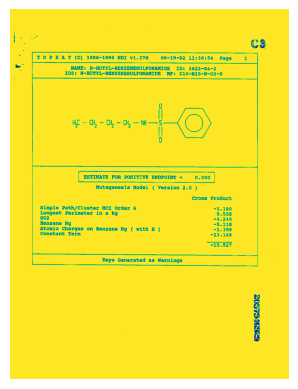

In [6]:
from PIL import Image
import matplotlib.pyplot as plt


def show_image(image_path):
    """
    Function to display an image from the given path.

    :param image_path: Path to the image file.
    """
    try:
        with Image.open(image_path) as img:
            plt.imshow(img)
            plt.axis("off")
            plt.show()
    except Exception as e:
        print(f"Error opening image: {e}")


# Example usage
show_image(image_path)

In [7]:
model_type = "prebuilt-layout"

result_ocr = document_intelligence_client.analyze_document(
    document_input=image_path,
    model_type=model_type,
    output_format="markdown",
    features=["OCR_HIGH_RESOLUTION"],
    # pages="1-4",
)

In [8]:
section_headings = [
    paragraph.content
    for paragraph in result_ocr.paragraphs
    if paragraph.role == "sectionHeading"
]

In [9]:
section_headings

[]

In [10]:
# retriving pages from the docuemnt
result_ocr.pages

[{'pageNumber': 1, 'angle': 0.25577789545059204, 'width': 754, 'height': 1000, 'unit': 'pixel', 'words': [{'content': 'C3', 'polygon': [649, 79, 693, 79, 694, 106, 649, 107], 'confidence': 0.993, 'span': {'offset': 17, 'length': 2}}, {'content': 'TOPKAT', 'polygon': [70, 123, 165, 123, 165, 139, 70, 138], 'confidence': 0.892, 'span': {'offset': 43, 'length': 6}}, {'content': '(C)', 'polygon': [176, 123, 195, 123, 195, 139, 175, 139], 'confidence': 0.948, 'span': {'offset': 50, 'length': 3}}, {'content': '1986-1990', 'polygon': [208, 123, 281, 123, 281, 139, 207, 139], 'confidence': 0.995, 'span': {'offset': 54, 'length': 9}}, {'content': 'HDI', 'polygon': [290, 123, 315, 123, 315, 139, 290, 139], 'confidence': 0.993, 'span': {'offset': 64, 'length': 3}}, {'content': 'v1.37d', 'polygon': [323, 123, 376, 124, 376, 138, 323, 139], 'confidence': 0.93, 'span': {'offset': 68, 'length': 6}}, {'content': '06-19-92', 'polygon': [405, 125, 473, 125, 473, 139, 405, 138], 'confidence': 0.995, 'spa

In [11]:
result_ocr.figures

[{'id': '1.1', 'boundingRegions': [{'pageNumber': 1, 'polygon': [165, 252, 546, 252, 546, 365, 165, 365]}], 'spans': [{'offset': 204, 'length': 98}], 'elements': ['/paragraphs/3', '/paragraphs/4']}]

In [12]:
result_ocr.tables

[{'rowCount': 9, 'columnCount': 2, 'cells': [{'kind': 'columnHeader', 'rowIndex': 0, 'columnIndex': 0, 'content': '', 'boundingRegions': [{'pageNumber': 1, 'polygon': [61, 493, 474, 495, 474, 524, 61, 522]}], 'spans': []}, {'kind': 'columnHeader', 'rowIndex': 0, 'columnIndex': 1, 'content': 'Cross Product', 'boundingRegions': [{'pageNumber': 1, 'polygon': [474, 495, 610, 496, 610, 525, 474, 524]}], 'spans': [{'offset': 395, 'length': 13}], 'elements': ['/paragraphs/7']}, {'rowIndex': 1, 'columnIndex': 0, 'content': 'Simple Path/Cluster MCI Order 6', 'boundingRegions': [{'pageNumber': 1, 'polygon': [61, 522, 474, 524, 474, 545, 60, 542]}], 'spans': [{'offset': 423, 'length': 31}], 'elements': ['/paragraphs/8']}, {'rowIndex': 1, 'columnIndex': 1, 'content': '-1.180', 'boundingRegions': [{'pageNumber': 1, 'polygon': [474, 524, 610, 525, 610, 546, 474, 545]}], 'spans': [{'offset': 457, 'length': 6}], 'elements': ['/paragraphs/9']}, {'rowIndex': 2, 'columnIndex': 0, 'content': 'Longest Peri

In [13]:
content = result_ocr.content

print(f"```markdown\n{content}\n```")

```markdown
<!-- PageNumber="C3" -->

<!-- PageNumber="TOPKAT (C) 1986-1990 HDI v1.37d 06-19-92 11:36:54 Page 1" -->

NAME: N-BUTYL-BENZENESULFONAMIDE ID: 3622-84-2 ID2: N-BUTYL-BENZENESULFONAMIDE MF: C10-H15-N-02-S

<figure>

![](figures/0)

<!-- FigureContent="0 HỌC - CH2 - CH2 - CH2 - NH -S 0" -->

</figure>

 :unselected:
ESTIMATE FOR POSITIVE ENDPOINT = 0.000

Mutagenesis Model ( Version 2.0 )

| | Cross Product |
| - | - |
| Simple Path/Cluster MCI Order 6 | -1.180 |
| Longest Perimeter in a Rg | 9.558 |
| SO2 | -4.240 |
| Benzene Rg | -5.118 |
| Atomic Charges on Benzene Rg ( with H ) | -1.399 |
| Constant Term | -13.148 |
| | -15.527 |
| Keys Generated as Warnings ||

2057946929

```


## Text Classification with LLM (Text + Prompt)

Classification of scanned text (OCR) using GPT-4 Omni.

In [14]:
from src.prompts.classification import get_classification_prompt
CLASSIFICATION_PROMPT = get_classification_prompt(result_ocr)

In [15]:
from src.aoai.azure_openai import AzureOpenAIManager

az_manager = AzureOpenAIManager(
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    chat_model_name=os.getenv("DEPLOYMENT_ID"),
    api_key=os.getenv("OPENAI_API_KEY"),
    api_version=os.getenv("DEPLOYMENT_VERSION"),
)

In [16]:
result_4o = az_manager.generate_chat_response(
            system_message_content="""You are an AI assistant specializing in the classification of documents derived from markdown text.
                                      Your task is to analyze the details within the text and apply deep reasoning to accurately categorize the documents.""",
            query=CLASSIFICATION_PROMPT,
            conversation_history=[],
            temperature=0,
        )

In [17]:
result_4o[0]

'scientific report'

In [18]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from src.prompts.classification import get_classification_prompt
import threading
from tabulate import tabulate
import time

y_true_list = []
y_pred_list = []
list_lock = threading.Lock()
error_count = 0
successful_times = []

# Filter the DataFrame to include only 10 rows per label
filtered_df = test_df.groupby('label').head(10)

def process_row(index, row):
    """
    Process a single row to generate chat response and return the true and predicted labels.

    Parameters:
    index (int): The index of the row.
    row (pd.Series): The row data.

    Returns:
    tuple: A tuple containing the true label and predicted label.
    """
    global error_count
    try:
        full_path = row["location"]
        document_type = row["label"]

        logger.info(
            f"Processing row {index}: Full Path: {full_path}, Document Type: {document_type}"
        )

        model_type = "prebuilt-layout"
        start_time = time.time()
        result_ocr = document_intelligence_client.analyze_document(
            document_input=full_path,
            model_type=model_type,
            output_format="markdown",
            features=["OCR_HIGH_RESOLUTION"],
        )

        CLASSIFICATION_PROMPT = get_classification_prompt(result_ocr)
        result_4o = az_manager.generate_chat_response(
            system_message_content="""You are an AI assistant specializing in the classification of documents derived from markdown text.
                                      Your task is to analyze the details within the text and apply deep reasoning to accurately categorize the documents.""",
            query=CLASSIFICATION_PROMPT,
            conversation_history=[],
            temperature=0,
        )

        if result_4o is None or result_4o[0] is None:
            logger.warning(
                f"Result is None for index {index}. File location: {full_path}"
            )
            error_count += 1
            return (None, None)
        else:
            end_time = time.time()
            successful_times.append(end_time - start_time)
            logger.info(
                f"Successfully processed row {index} in {end_time - start_time:.4f} seconds."
            )
            return (document_type, result_4o[0])
    except Exception as e:
        logger.error(f"Error processing row {index}: {e}")
        error_count += 1
        return (None, None)


with ThreadPoolExecutor(max_workers=5) as executor:
    futures = {
        executor.submit(process_row, index, row): index
        for index, row in filtered_df.iterrows()
    }

    for future in as_completed(futures):
        true_label, pred_label = future.result()
        if true_label is not None and pred_label is not None:
            with list_lock:
                y_true_list.append(true_label)
                y_pred_list.append(pred_label)

# Convert the lists to numpy arrays
y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

2024-08-14 09:59:11,357 - micro - MainProcess - INFO     Processing row 70: Full Path: utils\data\scanned\test\scientific report\scientific report_0.png, Document Type: scientific report (2834660235.py:process_row:33)
2024-08-14 09:59:11,363 - micro - MainProcess - INFO     Processing row 71: Full Path: utils\data\scanned\test\scientific report\scientific report_1.png, Document Type: scientific report (2834660235.py:process_row:33)


2024-08-14 09:59:11,368 - micro - MainProcess - INFO     Processing row 72: Full Path: utils\data\scanned\test\scientific report\scientific report_2.png, Document Type: scientific report (2834660235.py:process_row:33)
2024-08-14 09:59:11,375 - micro - MainProcess - INFO     Processing row 73: Full Path: utils\data\scanned\test\scientific report\scientific report_3.png, Document Type: scientific report (2834660235.py:process_row:33)
2024-08-14 09:59:11,384 - micro - MainProcess - INFO     Processing row 74: Full Path: utils\data\scanned\test\scientific report\scientific report_4.png, Document Type: scientific report (2834660235.py:process_row:33)
2024-08-14 09:59:16,497 - micro - MainProcess - INFO     Successfully processed row 70 in 5.1329 seconds. (2834660235.py:process_row:64)
2024-08-14 09:59:16,499 - micro - MainProcess - INFO     Processing row 75: Full Path: utils\data\scanned\test\scientific report\scientific report_5.png, Document Type: scientific report (2834660235.py:process

In [19]:
y_true

array(['scientific report', 'scientific report', 'scientific report',
       'scientific report', 'scientific report', 'scientific report',
       'scientific report', 'scientific report', 'scientific report',
       'scientific report', 'form', 'form', 'form', 'form', 'form',
       'form', 'form', 'form', 'form', 'form', 'resume', 'resume',
       'resume', 'resume', 'resume', 'resume', 'resume', 'resume',
       'resume', 'invoice', 'resume', 'invoice', 'invoice', 'invoice',
       'invoice', 'invoice', 'invoice', 'invoice', 'file folder',
       'invoice', 'invoice', 'file folder', 'file folder', 'file folder',
       'file folder', 'file folder', 'file folder', 'file folder',
       'file folder', 'file folder', 'questionnaire', 'questionnaire',
       'questionnaire', 'questionnaire', 'questionnaire', 'questionnaire',
       'questionnaire', 'questionnaire', 'questionnaire', 'handwritten',
       'handwritten', 'handwritten', 'questionnaire', 'handwritten',
       'handwritten', 

In [20]:
y_pred

array(['scientific publication', 'scientific report', 'scientific report',
       'scientific report', 'scientific report', 'scientific report',
       'form', 'scientific report', 'scientific report',
       'scientific report', 'letter', 'letter', 'letter', 'form', 'fax',
       'letter', 'form', 'letter', 'letter', 'form', 'resume',
       'scientific report', 'resume', 'resume', 'form', 'resume', 'form',
       'resume', 'form', 'invoice', 'scientific report', 'invoice',
       'form', 'invoice', 'invoice', 'invoice', 'invoice', 'form', 'form',
       'invoice', 'invoice', 'advertisement', 'file folder',
       'file folder', 'scientific publication', 'scientific report',
       'scientific report', 'handwritten', 'handwritten', 'file folder',
       'questionnaire', 'form', 'questionnaire', 'questionnaire',
       'questionnaire', 'questionnaire', 'questionnaire', 'form',
       'advertisement', 'letter', 'memo', 'letter', 'form', 'letter',
       'letter', 'letter', 'letter', 'le

In [21]:
from utils.time import calculate_statistics

calculate_statistics(successful_times, error_count)

+----------------------------------------+---------+
| Statistic                              |   Value |
+========================================+=========+
| Average time per run (seconds)         |  6.3752 |
+----------------------------------------+---------+
| Median time per run (seconds)          |  5.8774 |
+----------------------------------------+---------+
| Minimum time per run (seconds)         |  4.6007 |
+----------------------------------------+---------+
| Maximum time per run (seconds)         | 16.4037 |
+----------------------------------------+---------+
| 95th percentile time per run (seconds) |  9.6488 |
+----------------------------------------+---------+
| 99th percentile time per run (seconds) | 13.3721 |
+----------------------------------------+---------+
| Number of errors                       |  0      |
+----------------------------------------+---------+


In [22]:
from src.evaluations import ml
import numpy as np

labels = np.array(
    [
        "letter",
        "form",
        "email",
        "handwritten",
        "advertisement",
        "scientific report",
        "scientific publication",
        "specification",
        "file folder",
        "news article",
        "budget",
        "invoice",
        "presentation",
        "questionnaire",
        "resume",
        "memo",
    ]
)

# Evaluate the model with the simulated data
metrics, conf_matrix, class_report = ml.evaluate_model(
    y_true, y_pred, labels, show_visualization=True
)

2024-08-14 10:02:40,826 - micro - MainProcess - INFO     Evaluating model performance... (ml.py:evaluate_model:34)
2024-08-14 10:02:40,842 - micro - MainProcess - INFO     Invalid predictions detected and marked as 'hallucination':
  Hallucination  Count
0           fax      1
1          msds      1 (ml.py:evaluate_model:49)
2024-08-14 10:02:40,847 - micro - MainProcess - INFO     True labels corresponding to hallucinations:
      True Label  Count
0           form      1
1  specification      1 (ml.py:evaluate_model:60)
2024-08-14 10:02:40,849 - micro - MainProcess - INFO     Length of y_true_filtered: 158 (ml.py:evaluate_model:66)
2024-08-14 10:02:40,850 - micro - MainProcess - INFO     Length of y_pred_filtered: 158 (ml.py:evaluate_model:67)
2024-08-14 10:02:40,888 - micro - MainProcess - INFO     Accuracy: 0.5759 (ml.py:evaluate_model:90)
2024-08-14 10:02:40,890 - micro - MainProcess - INFO     Precision: 0.7011 (ml.py:evaluate_model:91)
2024-08-14 10:02:40,892 - micro - MainProces

In [23]:
class_report['invoice']

{'precision': 0.8888888888888888,
 'recall': 0.8,
 'f1-score': 0.8421052631578947,
 'support': 10.0}

In [24]:
class_report['budget']

{'precision': 1.0,
 'recall': 0.7,
 'f1-score': 0.8235294117647058,
 'support': 10.0}

## Text Classification with LLM (Text + Prompt)

Leverage phi-3 medium for classifying scanned text extracted via OCR.

In [25]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.core.credentials import AzureKeyCredential

model = ChatCompletionsClient(
    endpoint=os.environ["AZUREAI_ENDPOINT_URL_PHI_3_MEDIUM_128"],
    credential=AzureKeyCredential(os.environ["AZUREAI_ENDPOINT_KEY_PHI_3_MEDIUM_128"]),
)

In [26]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from src.prompts.classification import get_classification_prompt
import threading
from azure.ai.inference.models import SystemMessage, UserMessage

import time

y_true_list = []
y_pred_list = []
list_lock = threading.Lock()
error_count = 0
successful_times = []

def process_row(index, row):
    """
    Process a single row to generate chat response and return the true and predicted labels.

    Parameters:
    index (int): The index of the row.
    row (pd.Series): The row data.

    Returns:
    tuple: A tuple containing the true label and predicted label.
    """
    global error_count
    try:
        full_path = row["location"]
        document_type = row["label"]

        logger.info(
            f"Processing row {index}: Full Path: {full_path}, Document Type: {document_type}"
        )

        model_type = "prebuilt-layout"
        start_time = time.time()
        result_ocr = document_intelligence_client.analyze_document(
            document_input=full_path,
            model_type=model_type,
            output_format="markdown",
            features=["OCR_HIGH_RESOLUTION"],
        )

        CLASSIFICATION_PROMPT = get_classification_prompt(result_ocr)
        response = model.complete(
            messages=[
                SystemMessage(
                    content="""You are an AI assistant specializing in the classification of documents derived from markdown text.
                                      Your task is to analyze the details within the text and apply deep reasoning to accurately categorize the documents."""
                ),
                UserMessage(content=CLASSIFICATION_PROMPT),
            ],
            model_extras={"safe_mode": True, "temperature": 0},
        )

        result_phi_3 = response.choices[0].message.content

        if result_phi_3 is None:
            logger.warning(
                f"Result is None for index {index}. File location: {full_path}"
            )
            error_count += 1
            return (None, None)
        else:
            end_time = time.time()
            successful_times.append(end_time - start_time)
            logger.info(
                f"Successfully processed row {index} in {end_time - start_time:.4f} seconds."
            )
            result_phi_3 = result_phi_3.replace(" ", "").replace('"', "")
            return (document_type, result_phi_3)
    except Exception as e:
        logger.error(f"Error processing row {index}: {e}")
        error_count += 1
        return (None, None)


with ThreadPoolExecutor(max_workers=5) as executor:
    futures = {
        executor.submit(process_row, index, row): index
        for index, row in filtered_df.iterrows()
    }

    for future in as_completed(futures):
        true_label, pred_label = future.result()
        if true_label is not None and pred_label is not None:
            with list_lock:
                y_true_list.append(true_label)
                y_pred_list.append(pred_label)

# Convert the lists to numpy arrays
y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

2024-08-14 10:02:45,969 - micro - MainProcess - INFO     Processing row 70: Full Path: utils\data\scanned\test\scientific report\scientific report_0.png, Document Type: scientific report (1288897798.py:process_row:31)
2024-08-14 10:02:45,975 - micro - MainProcess - INFO     Processing row 71: Full Path: utils\data\scanned\test\scientific report\scientific report_1.png, Document Type: scientific report (1288897798.py:process_row:31)
2024-08-14 10:02:45,983 - micro - MainProcess - INFO     Processing row 72: Full Path: utils\data\scanned\test\scientific report\scientific report_2.png, Document Type: scientific report (1288897798.py:process_row:31)
2024-08-14 10:02:45,992 - micro - MainProcess - INFO     Processing row 73: Full Path: utils\data\scanned\test\scientific report\scientific report_3.png, Document Type: scientific report (1288897798.py:process_row:31)
2024-08-14 10:02:46,001 - micro - MainProcess - INFO     Processing row 74: Full Path: utils\data\scanned\test\scientific report

In [27]:
from utils.time import calculate_statistics

calculate_statistics(successful_times, error_count)

+----------------------------------------+---------+
| Statistic                              |   Value |
+========================================+=========+
| Average time per run (seconds)         | 25.8966 |
+----------------------------------------+---------+
| Median time per run (seconds)          | 22.593  |
+----------------------------------------+---------+
| Minimum time per run (seconds)         |  4.6551 |
+----------------------------------------+---------+
| Maximum time per run (seconds)         | 94.335  |
+----------------------------------------+---------+
| 95th percentile time per run (seconds) | 54.8122 |
+----------------------------------------+---------+
| 99th percentile time per run (seconds) | 94.2797 |
+----------------------------------------+---------+
| Number of errors                       |  0      |
+----------------------------------------+---------+


In [28]:
from src.evaluations import ml
import numpy as np

labels = np.array(
    [
        "letter",
        "form",
        "email",
        "handwritten",
        "advertisement",
        "scientific report",
        "scientific publication",
        "specification",
        "file folder",
        "news article",
        "budget",
        "invoice",
        "presentation",
        "questionnaire",
        "resume",
        "memo",
    ]
)

# Evaluate the model with the simulated data
metrics, conf_matrix, class_report = ml.evaluate_model(
    y_true, y_pred, labels, show_visualization=True
)

2024-08-14 10:16:39,295 - micro - MainProcess - INFO     Evaluating model performance... (ml.py:evaluate_model:34)
2024-08-14 10:16:39,304 - micro - MainProcess - INFO     Invalid predictions detected and marked as 'hallucination':
                                       Hallucination  Count
0                                   scientificreport     39
1                                        newsarticle      6
2                              scientificpublication      2
3  Basedontheprovidedtext,thedocumentappearstobea...      1
4  advertisementioned.\n\nBasedonthetext:PlayersL...      1
5  Basedontheprovidedtext,thedocumentappearstobea...      1
6  Basedontheprovided,thedocumentappearstobeascie...      1 (ml.py:evaluate_model:49)
2024-08-14 10:16:39,313 - micro - MainProcess - INFO     True labels corresponding to hallucinations:
                True Label  Count
0   scientific publication     10
1        scientific report      9
2             news article      8
3             presentati

In [29]:
y_true

array(['scientific report', 'scientific report', 'scientific report',
       'scientific report', 'scientific report', 'scientific report',
       'scientific report', 'scientific report', 'scientific report',
       'scientific report', 'form', 'form', 'form', 'form', 'form',
       'form', 'form', 'form', 'resume', 'form', 'form', 'resume',
       'resume', 'resume', 'resume', 'resume', 'resume', 'resume',
       'resume', 'resume', 'invoice', 'invoice', 'invoice', 'invoice',
       'invoice', 'invoice', 'invoice', 'invoice', 'invoice', 'invoice',
       'file folder', 'file folder', 'file folder', 'file folder',
       'file folder', 'file folder', 'file folder', 'file folder',
       'file folder', 'file folder', 'questionnaire', 'questionnaire',
       'questionnaire', 'questionnaire', 'questionnaire', 'questionnaire',
       'questionnaire', 'handwritten', 'questionnaire', 'handwritten',
       'questionnaire', 'questionnaire', 'handwritten', 'handwritten',
       'handwritten', 

In [30]:
y_pred

array(['scientificreport', 'scientificreport', 'scientificreport',
       'scientificreport', 'scientificreport', 'form', 'scientificreport',
       'scientificreport', 'scientificreport', 'scientificreport',
       'letter', 'letter', 'letter', 'letter', 'form', 'letter',
       'advertisement', 'letter', 'resume', 'letter', 'form', 'resume',
       'scientificreport', 'scientificreport', 'scientificreport', 'form',
       'form', 'form', 'scientificreport', 'resume', 'form', 'invoice',
       'invoice', 'invoice', 'invoice', 'invoice', 'invoice', 'invoice',
       'form', 'invoice', 'form', 'letter', 'invoice',
       'Basedontheprovidedtext,thedocumentappearstobeamemo.Thetextincludesaheader-likestructurewiththecontentSCHOLAR,ERIC,M!DISCOURAGEDandafooterwithPageFooter=50736838.Thecontentseemstobeabriefmessage,whichistypicalforamemo.Therefore,thecategoryis:\n\nmemo',
       'advertisementioned.\n\nBasedonthetext:PlayersLights100.\n-**TEXT**:**\n-**text:PlayersLights10.\n-**text**:\n-*

## Conclusion

GPT-4 Omni provides better out-of-the-box scores across all classes and offers improved latency throughout. In contrast, Phi-3 requires fine-tuning to achieve similar performance. We will be addressing the fine-tuning here..